In [135]:
import tensorflow

In [136]:
import h5py
import numpy as np

In [137]:
h5f = h5py.File('SVHN_single_grey1.h5','r')


In [138]:
list(h5f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [139]:
X_train = h5f['X_train'][:]
print(X_train.shape) 
print(X_train.dtype) 
print(X_train[0])

(42000, 32, 32)
float32
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [140]:
y_train=h5f['y_train'][:]
print(y_train.shape)
print(y_train.dtype)
print(y_train[0:5])

(42000,)
uint8
[2 6 7 4 4]


In [141]:
X_test = h5f['X_test'][:]
X_test.shape

(18000, 32, 32)

In [142]:
y_test = h5f['y_test'][:]
y_test.shape

(18000,)

#### Dataset attributes :
##### X_Train - 42,000 images of 32x32 pixels
##### Y_Train - 42,000 labels classifying each image
##### X_Test  - 18,000 images of 32x32 pixels to train
##### Y_Test  - 18,000 labels

Label: 7


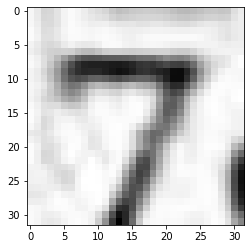

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[8000]))
plt.imshow(X_train[8000], cmap='gray')

### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 10
- we are doing this to use categorical_crossentropy as loss

In [144]:
from tensorflow.keras.utils import to_categorical

print("Value before encoding:", y_train[0])

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One hot encoded value of y_train:", y_train[0])

Value before encoding: 2
Shape of y_train: (42000, 10)
One hot encoded value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Define the model
- The Sequential model is a linear stack of layers.
- The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.
- You can also simply add layers via the .add() method

In [179]:
# Store all models in list to display comparison
models = []
histories=[]

In [180]:
# Initialize Sequential model
model1 = tensorflow.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model1.add(tensorflow.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model1.add(tensorflow.keras.layers.BatchNormalization())

#### Apply ReLU and Dropout

In [181]:
#### Apply ReLU and Dropout
# Hidden layers
model1.add(tensorflow.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model1.add(tensorflow.keras.layers.Dense(100, activation='relu', name='Layer_2'))
# Dropout layer
model1.add(tensorflow.keras.layers.Dropout(0.5))

# Hidden layers
model1.add(tensorflow.keras.layers.Dense(60, activation='relu', name='Layer_3'))
model1.add(tensorflow.keras.layers.Dense(30, activation='relu', name='Layer_4'))

# Dropout layer
model1.add(tensorflow.keras.layers.Dropout(0.3))

#Output layer
model1.add(tensorflow.keras.layers.Dense(10, activation='softmax', name='Output'))

### Compile the model
- Here we configure the model for training
- We will specify an optimizer, loss function and a metrics
- You can read more about it here https://keras.io/models/sequential/

In [182]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_33 (Reshape)         (None, 1024)              0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_66 (Dropout)         (None, 100)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
Layer_4 (Dense)              (None, 30)              

#### We will split the training set 80:20 for train:test

In [183]:
history1 = model1.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=50, batch_size = 32)

Epoch 1/50
1050/1050 [==============================] - 5s 5ms/step - loss: 2.2921 - accuracy: 0.1251 - val_loss: 2.1359 - val_accuracy: 0.2124
Epoch 2/50
1050/1050 [==============================] - 5s 5ms/step - loss: 2.1065 - accuracy: 0.2225 - val_loss: 1.9057 - val_accuracy: 0.3200
Epoch 3/50
1050/1050 [==============================] - 5s 5ms/step - loss: 1.9401 - accuracy: 0.3031 - val_loss: 1.6560 - val_accuracy: 0.4301
Epoch 4/50
1050/1050 [==============================] - 5s 5ms/step - loss: 1.7511 - accuracy: 0.3821 - val_loss: 1.4373 - val_accuracy: 0.5367
Epoch 5/50
1050/1050 [==============================] - 6s 6ms/step - loss: 1.5687 - accuracy: 0.4550 - val_loss: 1.1907 - val_accuracy: 0.6417
Epoch 6/50
1050/1050 [==============================] - 5s 5ms/step - loss: 1.4428 - accuracy: 0.5094 - val_loss: 1.0889 - val_accuracy: 0.6548
Epoch 7/50
1050/1050 [==============================] - 5s 5ms/step - loss: 1.3498 - accuracy: 0.5454 - val_loss: 1.0043 - val_accuracy:

In [184]:
models.append(("Base Model",model1))

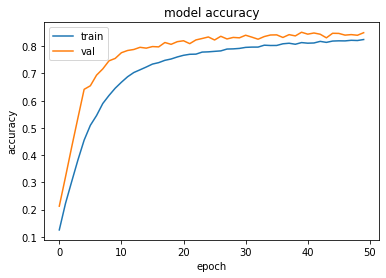

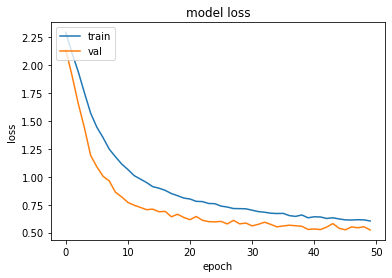

In [195]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [199]:
model2 = tensorflow.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model2.add(tensorflow.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model2.add(tensorflow.keras.layers.BatchNormalization())

In [200]:
# Hidden layers
model2.add(tensorflow.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model2.add(tensorflow.keras.layers.Dense(100, activation='relu', name='Layer_2'))
model2.add(tensorflow.keras.layers.Dense(60, activation='relu', name='Layer_3'))

# Dropout layer
model2.add(tensorflow.keras.layers.Dropout(0.5))

# Hidden layers
model2.add(tensorflow.keras.layers.Dense(90, activation='relu', name='Layer_4'))
model2.add(tensorflow.keras.layers.Dense(60, activation='relu', name='Layer_5'))
model2.add(tensorflow.keras.layers.Dense(30, activation='relu', name='Layer_6'))

# Dropout layer
model2.add(tensorflow.keras.layers.Dropout(0.3))

#Output layer
model2.add(tensorflow.keras.layers.Dense(10, activation='softmax', name='Output'))

In [201]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model2.summary())
history2 = model2.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=50, batch_size = 32)

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_35 (Reshape)         (None, 1024)              0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
Layer_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
dropout_70 (Dropout)         (None, 60)                0         
_________________________________________________________________
Layer_4 (Dense)              (None, 90)              

In [202]:
models.append(("Increase Layer", model2))

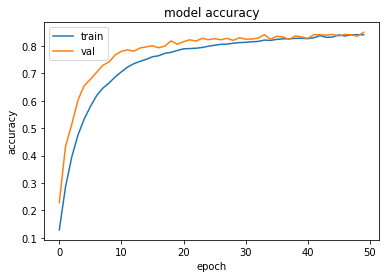

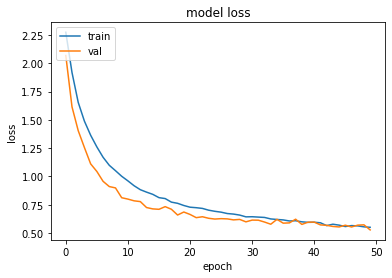

In [203]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [204]:
model3 = tensorflow.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model3.add(tensorflow.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model3.add(tensorflow.keras.layers.BatchNormalization())
# Hidden layers
model3.add(tensorflow.keras.layers.Dense(400, activation='relu', name='Layer_1'))
model3.add(tensorflow.keras.layers.Dense(200, activation='relu', name='Layer_2'))


# Dropout layer
model3.add(tensorflow.keras.layers.Dropout(0.5))

# Hidden layers
model3.add(tensorflow.keras.layers.Dense(200, activation='relu', name='Layer_3'))
model3.add(tensorflow.keras.layers.Dense(100, activation='relu', name='Layer_4'))

# Dropout layer
model3.add(tensorflow.keras.layers.Dropout(0.3))

#Output layer
model3.add(tensorflow.keras.layers.Dense(10, activation='softmax', name='Output'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model3.summary())
history3 = model3.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=50, batch_size = 32)

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_36 (Reshape)         (None, 1024)              0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 400)               410000    
_________________________________________________________________
Layer_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_72 (Dropout)         (None, 200)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
Layer_4 (Dense)              (None, 100)             

In [205]:
models.append(("Increase Neurons", model3))

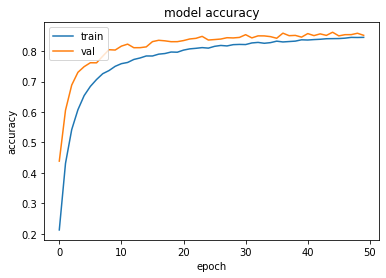

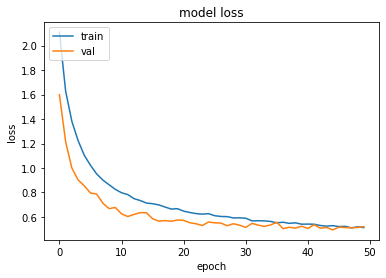

In [206]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [207]:
model4 = tensorflow.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model4.add(tensorflow.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model4.add(tensorflow.keras.layers.BatchNormalization())
# Hidden layers
model4.add(tensorflow.keras.layers.Dense(500, activation='relu', name='Layer_1'))
model4.add(tensorflow.keras.layers.Dense(400, activation='relu', name='Layer_2'))
# Dropout layer
# model4.add(tensorflow.keras.layers.Dropout(0.2))
model4.add(tensorflow.keras.layers.Dense(400, activation='relu', name='Layer_3'))
model4.add(tensorflow.keras.layers.Dense(300, activation='relu', name='Layer_4'))


# Dropout layer
model4.add(tensorflow.keras.layers.Dropout(0.5))

# Hidden layers
model4.add(tensorflow.keras.layers.Dense(300, activation='relu', name='Layer_5'))
model4.add(tensorflow.keras.layers.Dense(200, activation='relu', name='Layer_6'))
model4.add(tensorflow.keras.layers.Dense(100, activation='relu', name='Layer_7'))

# Dropout layer
model4.add(tensorflow.keras.layers.Dropout(0.3))

#Output layer
model4.add(tensorflow.keras.layers.Dense(10, activation='softmax', name='Output'))
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model4.summary())
history4=model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size = 64)

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_37 (Reshape)         (None, 1024)              0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 500)               512500    
_________________________________________________________________
Layer_2 (Dense)              (None, 400)               200400    
_________________________________________________________________
Layer_3 (Dense)              (None, 400)               160400    
_________________________________________________________________
Layer_4 (Dense)              (None, 300)               120300    
_________________________________________________________________
dropout_74 (Dropout)         (None, 300)             

In [208]:
models.append(("Increase both Layers and Neurons", model4))

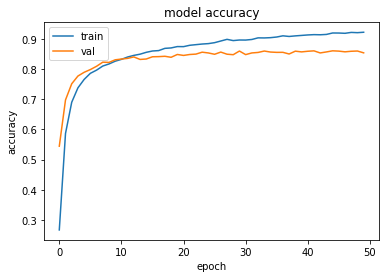

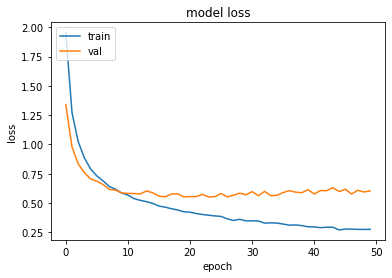

In [209]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Consolidate Model Results

In [210]:
print('---------- Evaluating Models -----------')
for name, model in models:
    print(f'**** {name}')
    print("**** Validation Result:",model.evaluate(X_test, y_test))
    

---------- Evaluating Models -----------
**** Base Model
563/563 [==============================] - 1s 2ms/step - loss: 0.5299 - accuracy: 0.8501
**** Validation Result: [0.5299261808395386, 0.8500555753707886]
**** Increase Layer
563/563 [==============================] - 1s 2ms/step - loss: 0.5371 - accuracy: 0.8508
**** Validation Result: [0.5371163487434387, 0.850777804851532]
**** Increase Neurons
563/563 [==============================] - 2s 3ms/step - loss: 0.5522 - accuracy: 0.8448
**** Validation Result: [0.5521681904792786, 0.8447777628898621]
**** Increase both Layers and Neurons
563/563 [==============================] - 3s 5ms/step - loss: 0.6029 - accuracy: 0.8538
**** Validation Result: [0.6029410362243652, 0.8537777662277222]


#### Classification Accuracy Metrics

In [211]:
for name, model in models:
    print(f'***** Classification Accuracy Metrics : {name} *****')
    Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
    y_pred =np.argmax(model.predict(X_test), axis=-1)
    print(classification_report(Y_test, y_pred))
          

***** Classification Accuracy Metrics : Base Model *****
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1814
           1       0.80      0.88      0.84      1828
           2       0.87      0.87      0.87      1803
           3       0.86      0.78      0.82      1719
           4       0.87      0.88      0.88      1812
           5       0.79      0.88      0.84      1768
           6       0.87      0.83      0.85      1832
           7       0.88      0.88      0.88      1808
           8       0.86      0.81      0.84      1812
           9       0.87      0.79      0.83      1804

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000

***** Classification Accuracy Metrics : Increase Layer *****
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1814
           1  

#### Model 4 where we have increased both the number of neurons and number of layers has moved to the overfit zone.